### Looking at the relationship between campaign contributions and election results

More information on the funds raised [here](https://missionlocal.org/2024/03/explore-more-than-11m-is-going-towards-san-franciscos-march-5-election/?_thumbnail_id=585783)

In [21]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


This is a dataframe that contains a row for each candidate (51 total) in the DCCC race, how many votes they received and also how much money they raised.

In [22]:
df = pd.read_csv('dccc_data.csv')

In [23]:
df.head(5)

,contest,amount_raised,slate,votes,race
0,Adolfo Velasquez,17453.0,progressive,9735,DCCC
1,Anita Martinez,16572.0,progressive,11181,DCCC
2,Bilal Mahmood,274675.0,moderate,15631,DCCC
3,Brian Quan,52817.0,moderate,9614,DCCC
4,Carrie Barnes,141043.0,moderate,13946,DCCC


In [24]:
to_plot = df.melt(id_vars=['amount_raised','votes'])

In [26]:
to_plot.plot.scatter(x='amount_raised', y='votes')


<AxesSubplot: xlabel='amount_raised', ylabel='votes'>

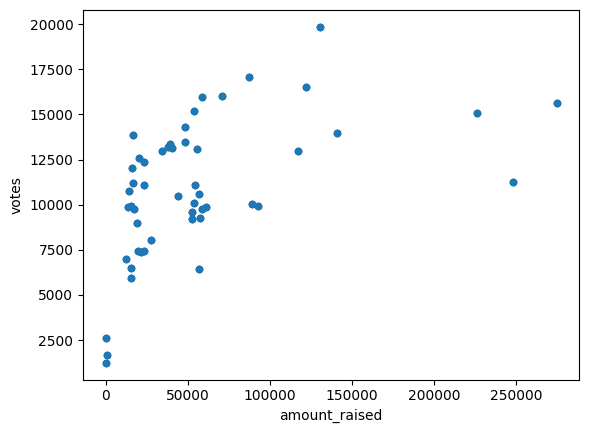

In [ ]:
plt.show()


The same visual here in D3 for the story: 
https://missionlocal.github.io/interactives/2024-DCCC-voteshare-spending/

In [ ]:
model = smf.ols("votes ~ amount_raised", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     16.63
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           0.000167
Time:                        11:09:26   Log-Likelihood:                -484.81
No. Observations:                  51   AIC:                             973.6
Df Residuals:                      49   BIC:                             977.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9082.9363    647.281     14.032      0.000    7782.177    1.04e+04
amount_raised     0.0324      0.008      4.077      0.000       0.016       0.048
==============================================================================
Omnibus:                        1.075   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.996
Skew:                          -0.325   Prob(JB):                        0.608
Kurtosis:                       2.784   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation: 

- There is a correlation between the amount of money raised and the number of votes a candidate received. 
- The correlation is statistically significant. 
- 25% of the change in votes can be explained by the change in money raised.

- BUT based on this, I cannot determine whether or not there is a causal relationship (!)
- I have spoken to a couple of experts who work at Berkeley in the political science department and they both said that while there is likely a causal relationship between these two variables, I cannot determine that from this data. There are also confounding variables, like how popular a candidate is, or whether they have been in office before, for example. The problem is, these are not variables that can be easily quantified, so I cannot just go ahead and run a multiple regression model to control for these variables.


